Fitness function is $f(x_1, x_2) = 20+x_1^2+x_2^2-10(cos(2 \pi x_1) + cos(2 \pi x_2))$.

### Needful packages 

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

### Genetic algorithm related functions 

In [3]:
def fitness(x1, x2):
    return 20 + x1 ** 2 + x2 ** 2 - 10 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2))

def generate_binary(bit_count):
    binary_strings = []
    def genbin(n, bs=''):
        if len(bs) == n:
            binary_strings.append(bs)
        else:
            genbin(n, bs + '0')
            genbin(n, bs + '1')

    genbin(bit_count)
    return binary_strings

def closest_point(x, y, l, a, b, c, d):
    x_list = [a + i*((b-a)/(2**l-1)) for i in range(2**l)]
    y_list = [c + i*((d-c)/(2**l-1)) for i in range(2**l)]
    idx = round((min(x_list, key = lambda t:abs(t - x)) - a)/((b-a)/(2**l-1)))
    idy = round((min(y_list, key = lambda t:abs(t - y))- c)/((d-c)/(2**l-1)))
    return generate_binary(l)[idx] + generate_binary(l)[idy]

def decode_binary(a, b, c, d, l, binary):
    x = a + int(binary[:len(binary)//2], 2) * ((b-a) / (2**l - 1))
    y = c + int(binary[len(binary)//2:], 2) * ((d-c) / (2**l - 1))
    return x, y

def roulette(population):
    pseudo_probs = [fitness(xi[0], xi[1]) for xi in population]
    choice = random.choices(population, weights=pseudo_probs, k=pop)
    return choice

def encode_population(population):
    encoded_population = []
    for chromosome in population:
        encoded_individual = closest_point(chromosome[0], chromosome[1], l, a, b, c, d)
        encoded_population.append(encoded_individual)
    return encoded_population

def mutate(population):
    for chromosome_idx in range(pop):
        new_gene = []
        for i in range(2*l):
            if np.random.rand() < p_mut:
                new_gene.append(str(1 - int(population[chromosome_idx][i])))
            else:
                new_gene.append(population[chromosome_idx][i])
        population[chromosome_idx] = ''.join(bit for bit in new_gene)
    return population

def crossover(chr_1, chr_2, child_population):
    if np.random.rand() < p_cros:
        chr1_x = chr_1[:l]
        chr1_y = chr_1[l:]
        chr2_x = chr_2[:l]
        chr2_y = chr_2[l:]
        idx = np.random.randint(1, l - 1)
        child1_x = chr1_x[:idx] + chr2_x[idx:]
        child1_y = chr2_y[:idx] + chr1_y[idx:]
        child_population.append(child1_x + child1_y)
        
        child2_x = chr1_x[idx:] + chr2_x[:idx]
        child2_y = chr2_y[idx:] + chr1_y[:idx]
        child_population.append(child2_x + child2_y)
        
def decode_population(population):
    decoded_population = []
    for chromosome in population:
        decoded_individual = decode_binary(a, b, c, d, l, chromosome)
        decoded_population.append(decoded_individual)
    return decoded_population

### Visualization of fitness function

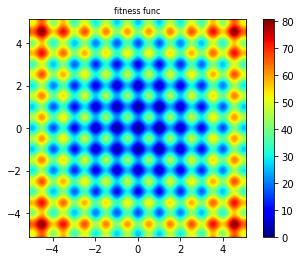

In [4]:
from pylab import figure, cm
x1_min = -5.12
x1_max = 5.12
x2_min = -5.12
x2_max = 5.12
x1, x2 = np.meshgrid(np.arange(x1_min,x1_max, 0.01), np.arange(x2_min,x2_max, 0.01))
y = fitness(x1,x2)
plt.imshow(y,extent=[x1_min,x1_max,x2_min,x2_max], cmap=cm.jet, origin='lower')
plt.colorbar()
plt.title("fitness func" , fontsize=8)
plt.show()

The algorithm should converge to (approximately) (5,5), (5,-5), (-5,5), (-5,-5).

### Parameters of genetic algorithm

In [5]:
# population size
pop = 40
# number of iterations 
it_max = 70
# probability of crossover 
p_cros = 0.4
# probablility of mutation 
p_mut = 0.006
# the end definiteness for variables in binary grid method
a = -5.12
b = 5.12
c = -5.12
d = 5.12
# length of binary sequence
l = 8

### Execution of functions

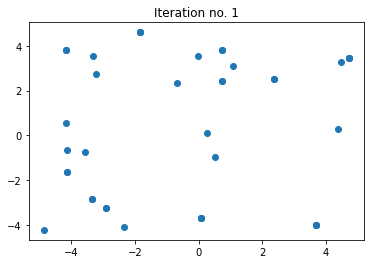

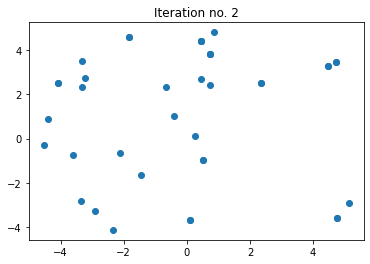

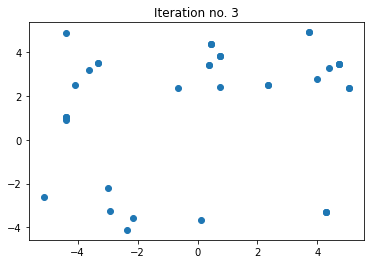

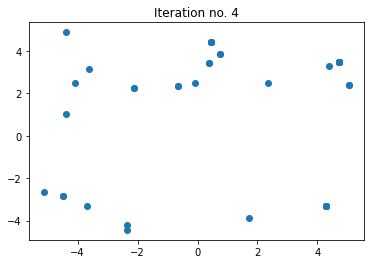

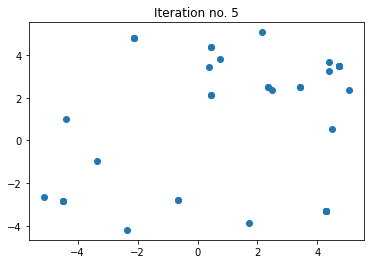

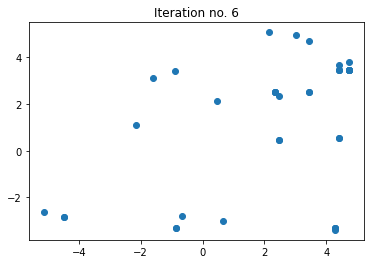

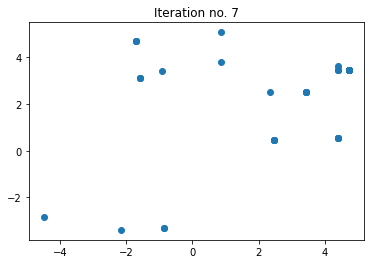

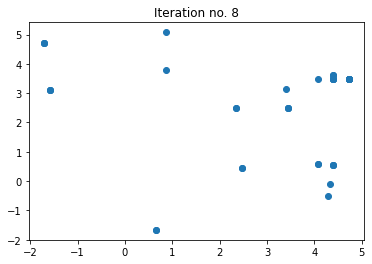

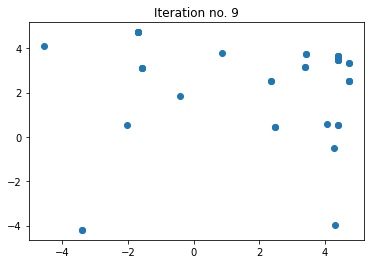

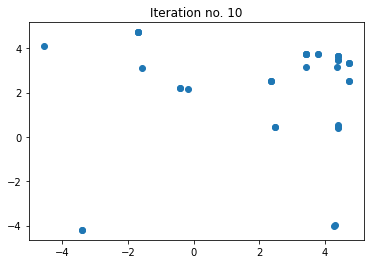

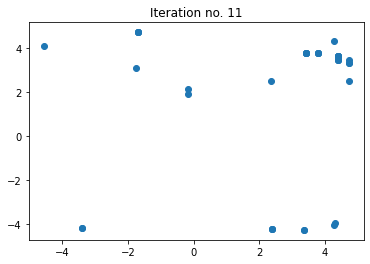

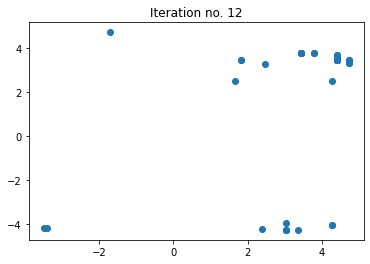

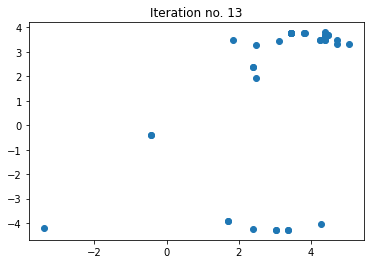

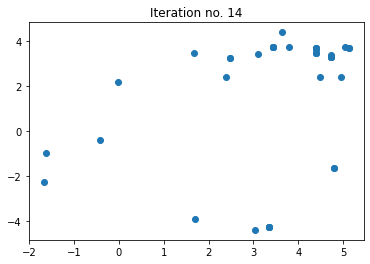

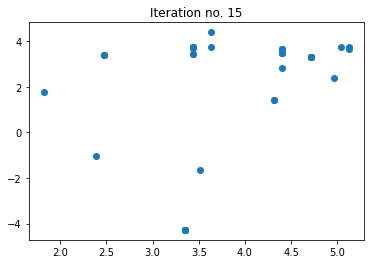

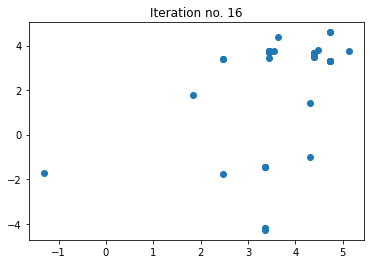

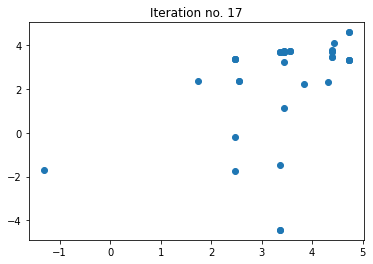

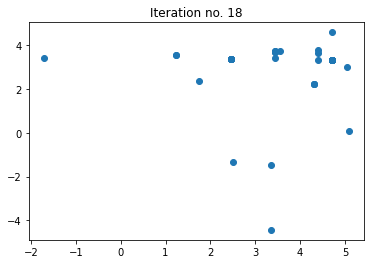

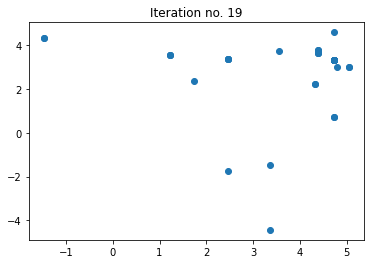

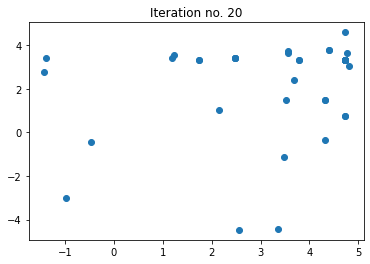

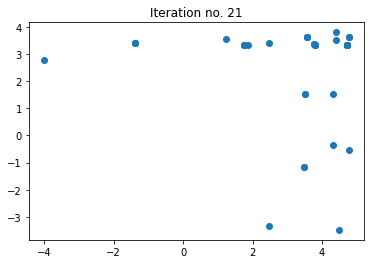

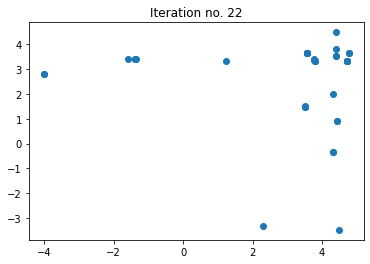

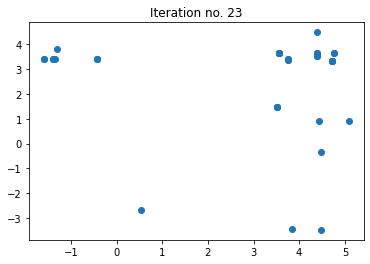

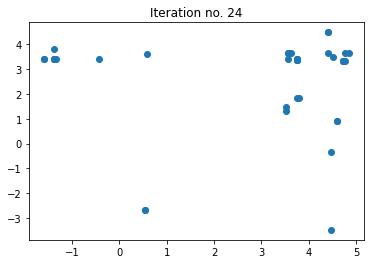

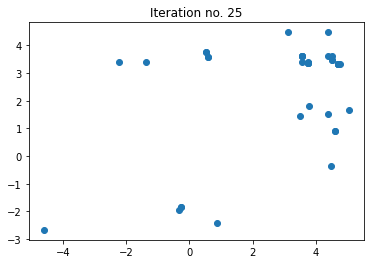

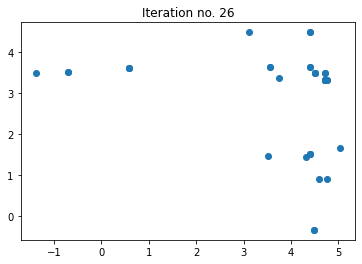

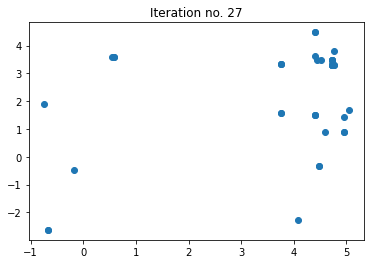

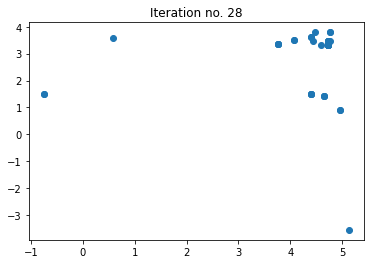

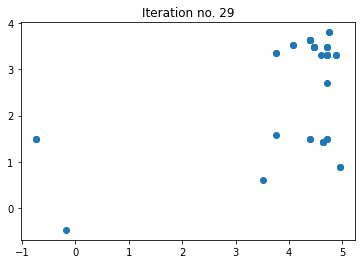

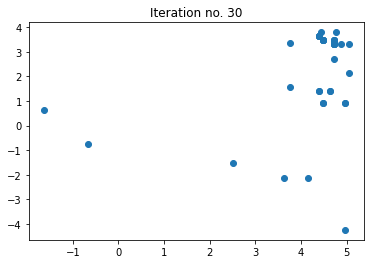

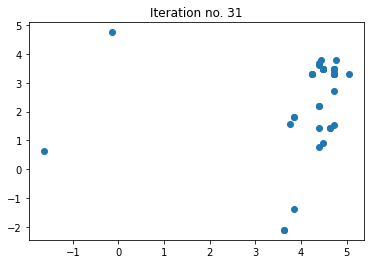

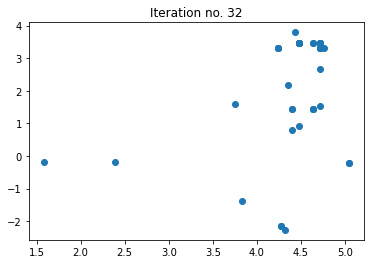

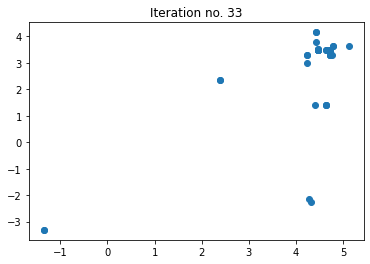

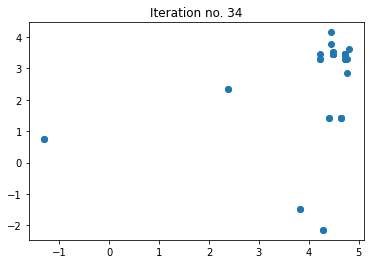

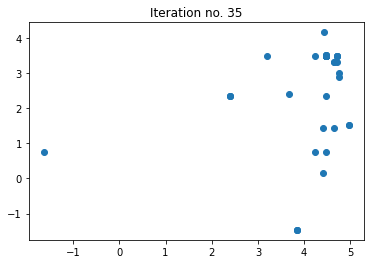

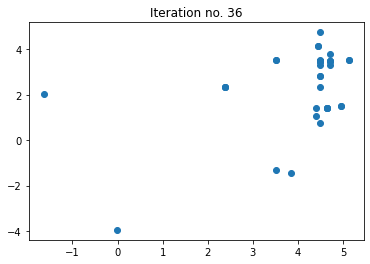

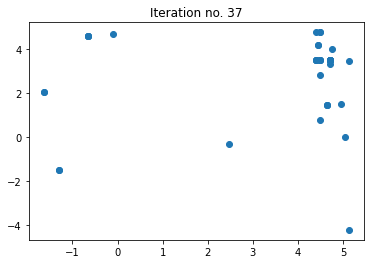

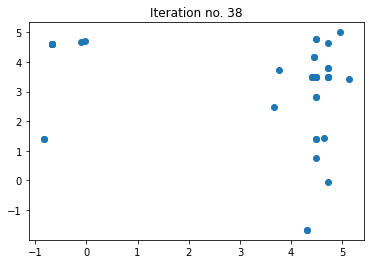

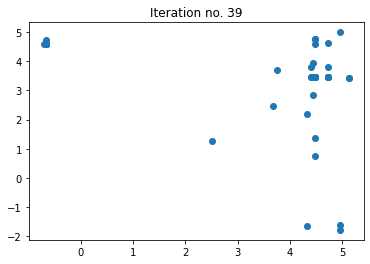

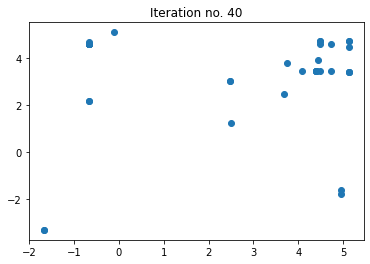

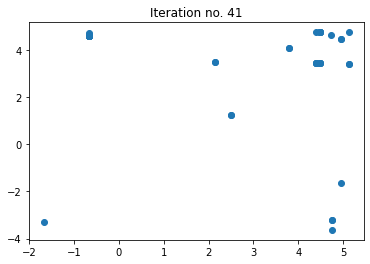

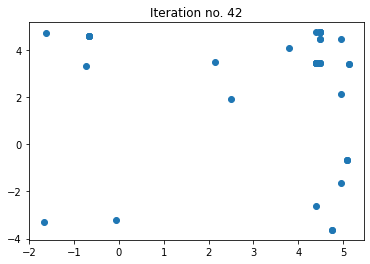

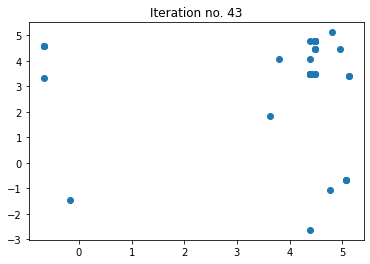

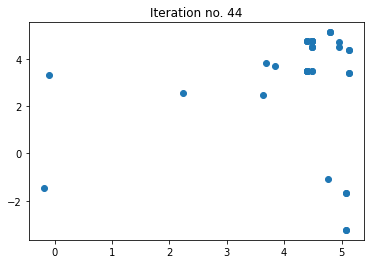

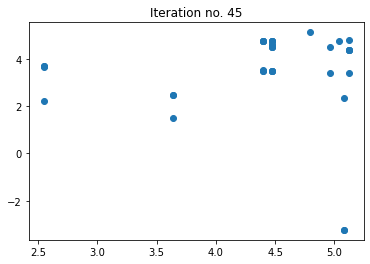

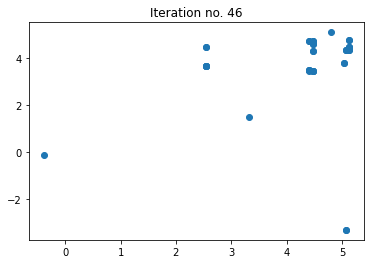

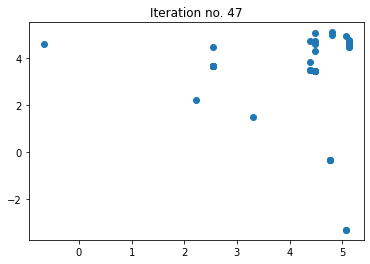

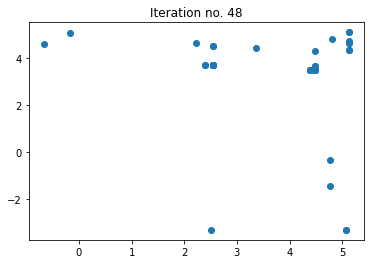

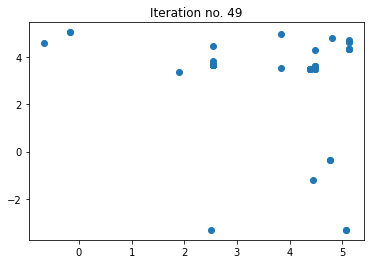

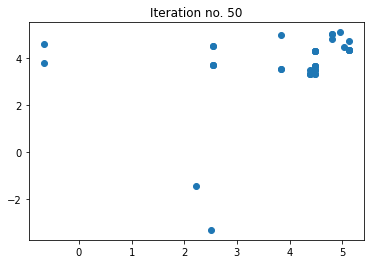

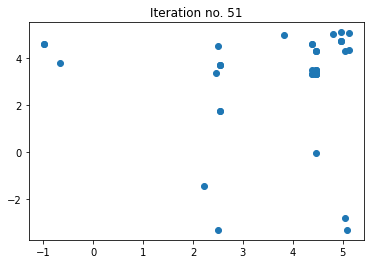

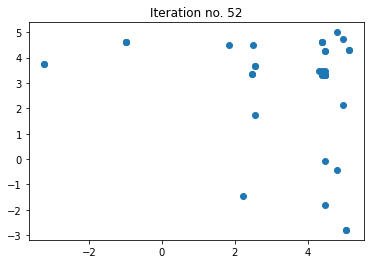

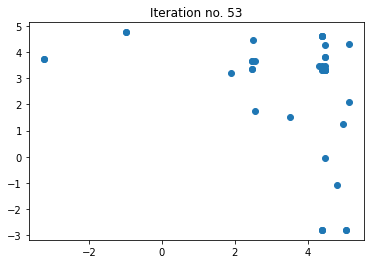

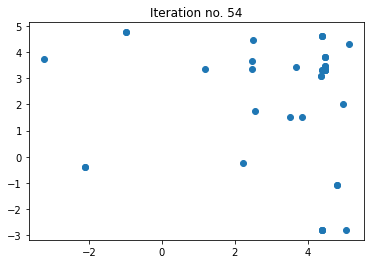

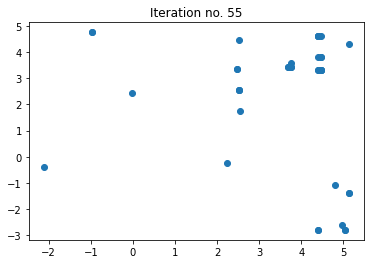

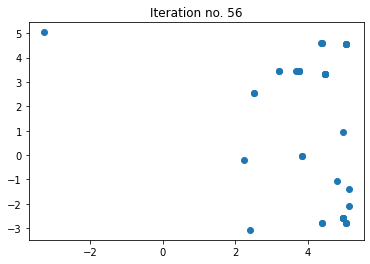

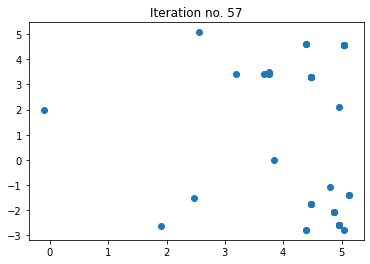

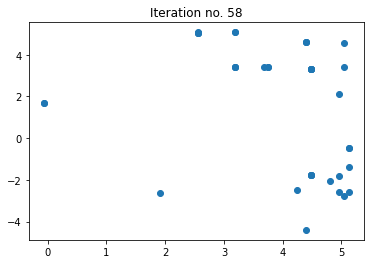

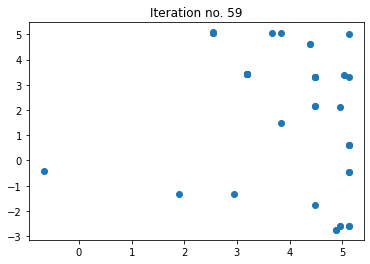

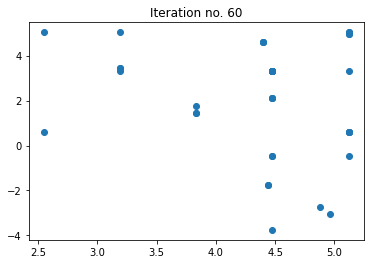

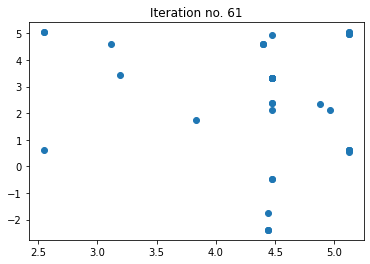

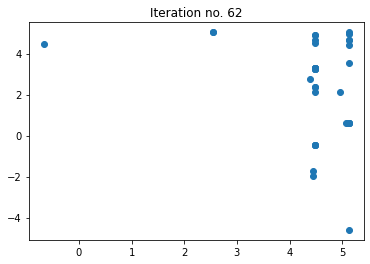

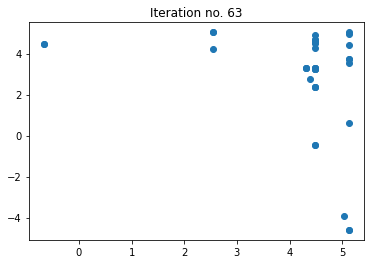

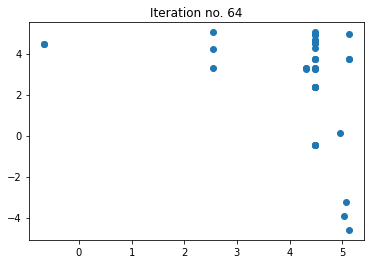

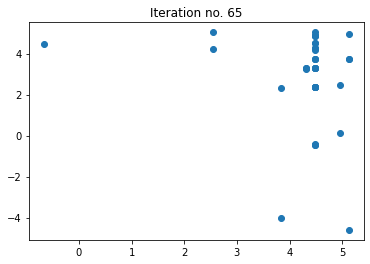

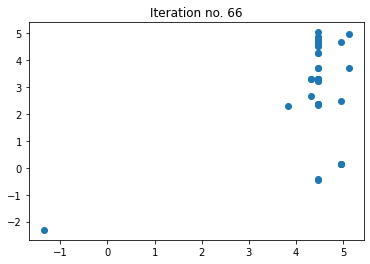

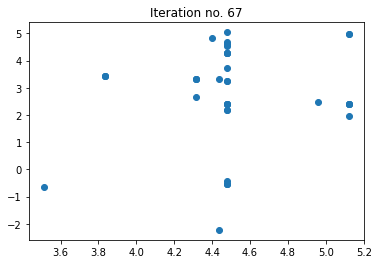

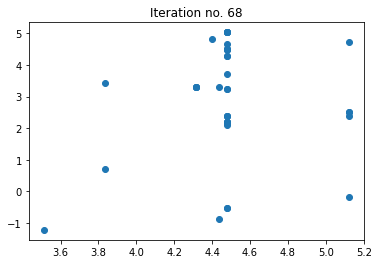

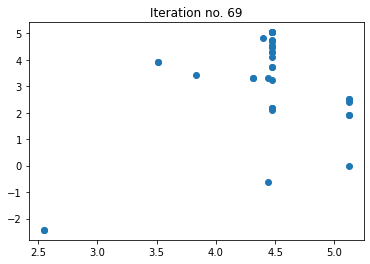

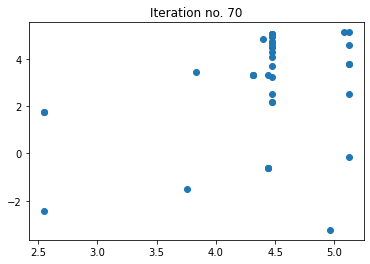

In [8]:
population = [(np.random.uniform(-5.12, 5.12), np.random.uniform(-5.12, 5.12)) for idx in range(pop)]
#print("Randomly selected first population:")
#print(str(population) + "\n")
for i in range(it_max):
    #print("Iteration no. " + str(i + 1) + "\n")
    population = roulette(population)
    #print("Population after roulette selection:")
    #print(str(population) + "\n")
    plt.clf()
    plt.scatter(*zip(*population))
    plt.title("Iteration no. " + str(i+1))
    plt.show()
    
    population = encode_population(population)
    #print("Population after encoding by binary grid method:")
    #print(str(population) + "9\n")
    
    population = mutate(population)
    #print("Population after bitwise mutation:")
    #print(str(population) + "\n")
    
    child_population = []
    for j in range(0, pop, 2):
        crossover(population[j], population[j+1], child_population)
    population = child_population + population
        
    population = decode_population(population)
    #print("Population after crossover and decoding to floating point numbers:")
    #print(str(population) + "\n \n \n \n")